In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Etude de la qualité des données téléchargées à partir du site Météo-France
#On se limite aux années >=2020


In [3]:
#lecture de la liste
df_mois=pd.read_csv(r"C:\DATA\meteo\liste_mois.csv")
df_mois["mois"]=df_mois["mois"].astype("str")
liste_mois=list(df_mois["mois"])

In [4]:
#Initialisation avec le dernier mois de la liste
nomFichier="C:\DATA\meteo\synop."+liste_mois[-1]+".csv"
data_synop=pd.read_csv(nomFichier,sep=";")

#Ajout des autres mois
for i in np.arange(len(liste_mois)-1):
    test=liste_mois[i]
    test=test[0:3]
    if test=="202":
        nomFichier="C:\DATA\meteo\synop."+liste_mois[i]+".csv"
        data=pd.read_csv(nomFichier,sep=";")
        data_synop=pd.concat([data_synop,data],axis=0)

#nombre de lignes du fichier résultant
print("dimensions data_synop :",data_synop.shape[0])

dimensions data_synop : 539661


In [5]:
#Première visualisation
data_synop.head(20)

#Observations:
# une colonne non définie "Unnamed 59"
# beaucoup de valeurs manquantes , que Météo France a eu la bonté de noter "mq"
# la conséquence de la notation mq est que toutes les colonnes sont de type object

,numer_sta,date,pmer,tend,cod_tend,dd,ff,t,td,u,...,nnuage2,ctype2,hnuage2,nnuage3,ctype3,hnuage3,nnuage4,ctype4,hnuage4,Unnamed: 59
0,7005,20230201000000,102600,-10,8,270,5.700000,280.150000,278.450000,89,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
1,7015,20230201000000,102450,-40,5,260,4.700000,280.250000,278.550000,89,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
2,7020,20230201000000,102950,0,5,300,7.800000,281.950000,277.150000,72,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
3,7027,20230201000000,102950,20,0,270,4.600000,280.350000,277.150000,80,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
4,7037,20230201000000,102790,-30,8,280,4.600000,280.350000,277.350000,81,...,8,mq,990,mq,mq,mq,mq,mq,mq,NaN
5,7072,20230201000000,102630,-80,8,250,4.700000,280.350000,278.350000,87,...,8,mq,780,mq,mq,mq,mq,mq,mq,NaN
6,7110,20230201000000,103260,0,0,280,1.300000,280.850000,277.950000,82,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
7,7117,20230201000000,103120,0,0,270,3.700000,282.550000,277.350000,70,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
8,7130,20230201000000,103160,0,5,290,2.800000,281.150000,278.450000,83,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
9,7139,20230201000000,103010,-10,5,290,3.300000,280.650000,277.450000,80,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN


In [6]:
#Analyse des manquants , du taux de manquants par variable , du nombre de lignes ave manquants
data_synop=data_synop.drop(["Unnamed: 59"],axis=1)

#Création d'un dataframe df_mq
df_mq=data_synop.drop(["numer_sta","date"],axis=1)
df_mq=df_mq.isin(["mq"]).replace(to_replace=[False,True],value=[0,1])
df_mq["nombre mq"]=df_mq.sum(axis=1) #total par ligne

#Dimensions de df_mq
df_mq.shape

(539661, 58)

<Figure size 1500x800 with 0 Axes>

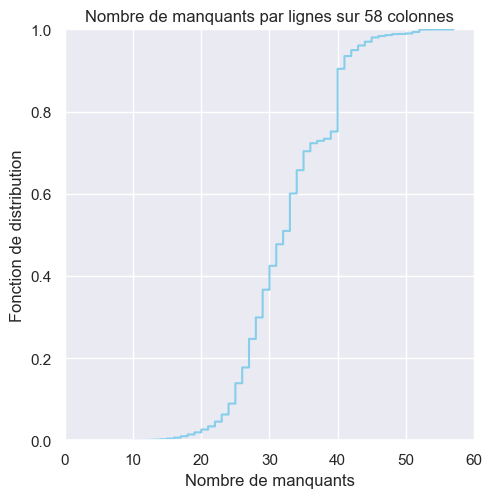

In [7]:
#Nombre de manquants  par ligne , distribution
plt.figure(figsize=(15,8))
sns.displot(df_mq["nombre mq"],kind="ecdf",color="#87CEEB")
plt.title("Nombre de manquants par lignes sur 58 colonnes")
plt.xlim([0,60])
plt.xlabel("Nombre de manquants")
plt.ylabel("Fonction de distribution");


In [8]:
#Conclusion : aucune ligne sans manquant

print("Nombre minimal de manquants par ligne:",df_mq["nombre mq"].min())
print("Nombre maximal de manquants par ligne:",df_mq["nombre mq"].max())

Nombre minimal de manquants par ligne: 10
Nombre maximal de manquants par ligne: 57


<Figure size 2000x2000 with 0 Axes>

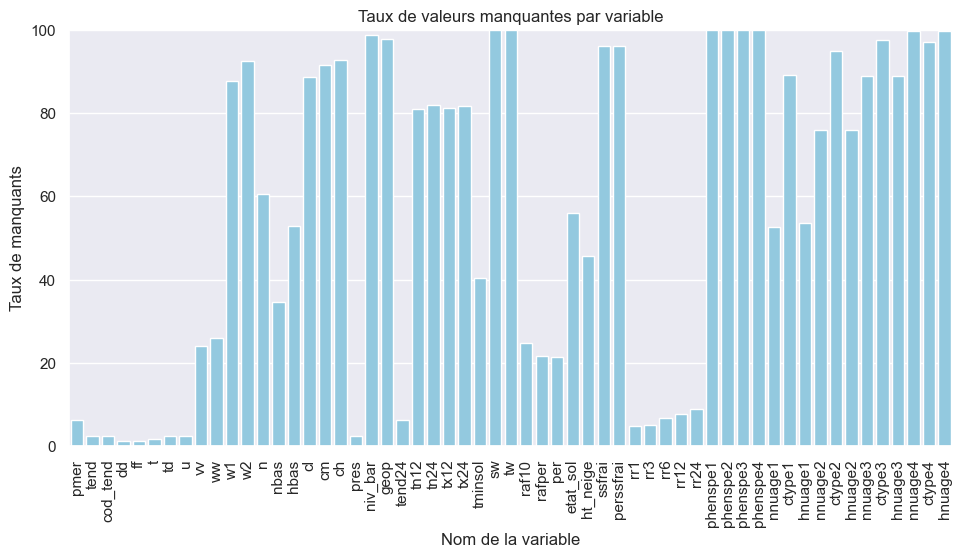

In [9]:
#Taux de manquants par variable
#Analyse par colonne.On créé un dataframe des totaux de colonnes ( en éliminant la colonne de total)

nbcol=df_mq.shape[1]-1
totaux_col=np.zeros(nbcol)
for i in np.arange(nbcol):
    totaux_col[i]=df_mq[df_mq.columns[i]].sum()
    
#Calcul des proportions en %   
totaux_col=totaux_col/df_mq.shape[0] *100
mq_col=pd.DataFrame({"variable":df_mq.columns[0:nbcol],"taux valeur mq":totaux_col[0:nbcol]}) 

#Graphique
plt.figure(figsize=(20,20))
sns.catplot(data=mq_col,y="taux valeur mq",x="variable",kind="bar",color="#87CEEB",aspect=2)
plt.ylim([0,100])
plt.ylabel("Taux de manquants")
plt.xticks(rotation=90)
plt.xlabel("Nom de la variable")
plt.title("Taux de valeurs manquantes par variable");


In [10]:
#Informations de distribution

print(mq_col.describe())

       taux valeur mq
count       57.000000
mean        57.052086
std         39.267926
min          1.198345
25%          8.915782
50%         75.929148
75%         94.852139
max        100.000000


<Figure size 1500x800 with 0 Axes>

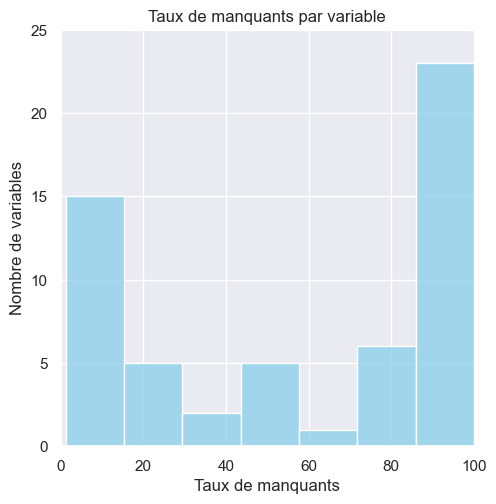

In [11]:
#Distribution du taux de manquants par variables

plt.figure(figsize=(15,8))
sns.displot(data=mq_col,x="taux valeur mq",kind="hist",color="#87CEEB")
plt.title("Taux de manquants par variable")
plt.xlabel("Taux de manquants")
plt.xlim([0,100])
plt.ylabel("Nombre de variables")
plt.ylim([0,25]);

#15 variables sur les 58 ont un taux de manquants inférieur à 10%

In [12]:
#liste variables où il y a moins de 10% de manquants en 2020 à 2023
mq_col=mq_col[mq_col["taux valeur mq"]<=10].reset_index(drop=True)
mq_col

,variable,taux valeur mq
0,pmer,6.264674
1,tend,2.363891
2,cod_tend,2.363706
3,dd,1.207981
4,ff,1.198345
5,t,1.758141
6,td,2.491749
7,u,2.418555
8,pres,2.509353
9,tend24,6.338053


In [13]:
#Conclusion:
#La grande majorité des variables sont inutilisables
#Nous retiendrons la vaiable de température t dont le taux de manquant est de 1.75% sur la période étudiée